### Project 1 . 
#### 10개의 feature를 선택하여 linear regression과 random forest regression을 사용해서 end point 구하기

In [48]:
import pandas as pd
csv_file_name = "qsar_input_file.csv"
sample_data = pd.read_csv(csv_file_name, sep=',')

X_data = sample_data.iloc[:,1:-1] # feature
y_data = sample_data.iloc[:,-1:] # end_point

In [49]:
#X_data   # Total dataframe
X_data.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,2.8332,8.027022,15.5429,6.481000,0,0,5,5,0,...,29.582709,8.500000,1.700000,9.000000,0.000000,0.0,16.0,0.0,2.791,20.0
1,0,0.6494,0.421720,13.7114,7.993379,0,0,9,6,3,...,11.112622,10.465990,1.744332,9.237437,2.332107,0.0,28.0,3.0,0.926,24.0
2,1,0.8583,0.736679,13.6539,7.461793,0,0,8,7,1,...,14.249108,12.293055,1.756151,11.587713,4.654701,0.0,42.0,6.0,0.619,30.0
3,0,2.7863,7.763468,27.3736,11.731000,0,0,8,8,0,...,23.237721,14.062500,1.757812,13.875000,0.000000,0.0,58.0,9.0,3.471,38.0
4,0,0.6467,0.418221,17.4897,10.977172,0,0,12,8,4,...,11.001652,14.271680,1.783960,11.777389,2.362609,0.0,62.0,9.0,1.291,34.0


In [50]:
X_data.shape

(56, 1444)

 ## Remove empty feature

In [51]:
X_data = X_data.dropna(axis=1)
X_data

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,2.8332,8.027022,15.5429,6.481000,0,0,5,5,0,...,29.582709,8.500000,1.700000,9.000000,0.000000,0.000000,16.0,0.0,2.791,20.0
1,0,0.6494,0.421720,13.7114,7.993379,0,0,9,6,3,...,11.112622,10.465990,1.744332,9.237437,2.332107,0.000000,28.0,3.0,0.926,24.0
2,1,0.8583,0.736679,13.6539,7.461793,0,0,8,7,1,...,14.249108,12.293055,1.756151,11.587713,4.654701,0.000000,42.0,6.0,0.619,30.0
3,0,2.7863,7.763468,27.3736,11.731000,0,0,8,8,0,...,23.237721,14.062500,1.757812,13.875000,0.000000,0.000000,58.0,9.0,3.471,38.0
4,0,0.6467,0.418221,17.4897,10.977172,0,0,12,8,4,...,11.001652,14.271680,1.783960,11.777389,2.362609,0.000000,62.0,9.0,1.291,34.0
5,0,1.5684,2.459879,17.0404,7.371000,0,0,6,6,0,...,19.327344,10.523646,1.753941,9.301424,0.000000,0.000000,29.0,4.0,1.643,22.0
6,0,2.3059,5.317175,36.1703,17.324965,0,0,15,10,5,...,9.735622,19.299499,1.929950,7.118022,0.000000,0.000000,114.0,11.0,2.329,48.0
7,0,1.1092,1.230325,39.7201,19.091758,0,0,17,11,6,...,9.473249,21.156414,1.923310,9.631554,0.000000,2.511186,148.0,13.0,1.204,54.0
8,0,2.5192,6.346369,39.3880,19.362172,0,0,17,13,4,...,11.236436,25.013203,1.924093,14.989086,4.828824,3.027184,240.0,17.0,1.913,64.0
9,0,2.6746,7.153485,40.8865,18.838172,0,0,15,11,4,...,11.999691,21.156620,1.923329,9.630425,0.000000,0.000000,152.0,13.0,2.273,54.0


### 중복 행 제거

In [52]:
X_data.drop_duplicates()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,2.8332,8.027022,15.5429,6.481000,0,0,5,5,0,...,29.582709,8.500000,1.700000,9.000000,0.000000,0.000000,16.0,0.0,2.791,20.0
1,0,0.6494,0.421720,13.7114,7.993379,0,0,9,6,3,...,11.112622,10.465990,1.744332,9.237437,2.332107,0.000000,28.0,3.0,0.926,24.0
2,1,0.8583,0.736679,13.6539,7.461793,0,0,8,7,1,...,14.249108,12.293055,1.756151,11.587713,4.654701,0.000000,42.0,6.0,0.619,30.0
3,0,2.7863,7.763468,27.3736,11.731000,0,0,8,8,0,...,23.237721,14.062500,1.757812,13.875000,0.000000,0.000000,58.0,9.0,3.471,38.0
4,0,0.6467,0.418221,17.4897,10.977172,0,0,12,8,4,...,11.001652,14.271680,1.783960,11.777389,2.362609,0.000000,62.0,9.0,1.291,34.0
5,0,1.5684,2.459879,17.0404,7.371000,0,0,6,6,0,...,19.327344,10.523646,1.753941,9.301424,0.000000,0.000000,29.0,4.0,1.643,22.0
6,0,2.3059,5.317175,36.1703,17.324965,0,0,15,10,5,...,9.735622,19.299499,1.929950,7.118022,0.000000,0.000000,114.0,11.0,2.329,48.0
7,0,1.1092,1.230325,39.7201,19.091758,0,0,17,11,6,...,9.473249,21.156414,1.923310,9.631554,0.000000,2.511186,148.0,13.0,1.204,54.0
8,0,2.5192,6.346369,39.3880,19.362172,0,0,17,13,4,...,11.236436,25.013203,1.924093,14.989086,4.828824,3.027184,240.0,17.0,1.913,64.0
9,0,2.6746,7.153485,40.8865,18.838172,0,0,15,11,4,...,11.999691,21.156620,1.923329,9.630425,0.000000,0.000000,152.0,13.0,2.273,54.0


In [53]:
X_data.shape

(56, 1407)

### 0값 가진 descriptor 삭제

In [54]:
X_data != 0

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,False,True,True,True,True,False,False,True,True,False,...,True,True,True,True,False,False,True,False,True,True
1,False,True,True,True,True,False,False,True,True,True,...,True,True,True,True,True,False,True,True,True,True
2,True,True,True,True,True,False,False,True,True,True,...,True,True,True,True,True,False,True,True,True,True
3,False,True,True,True,True,False,False,True,True,False,...,True,True,True,True,False,False,True,True,True,True
4,False,True,True,True,True,False,False,True,True,True,...,True,True,True,True,True,False,True,True,True,True
5,False,True,True,True,True,False,False,True,True,False,...,True,True,True,True,False,False,True,True,True,True
6,False,True,True,True,True,False,False,True,True,True,...,True,True,True,True,False,False,True,True,True,True
7,False,True,True,True,True,False,False,True,True,True,...,True,True,True,True,False,True,True,True,True,True
8,False,True,True,True,True,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,False,True,True,True,True,False,False,True,True,True,...,True,True,True,True,False,False,True,True,True,True


In [55]:
# 0이 아닌 항목이 있는 열을 나타내는 bull계열 반환
# any연산은 행을 따라 단일 부울 값으로 값을 집계
(X_data != 0).any(axis=0)

nAcid     True
ALogP     True
ALogp2    True
AMR       True
apol      True
          ... 
WTPT-5    True
WPATH     True
WPOL      True
XLogP     True
Zagreb    True
Length: 1407, dtype: bool

In [56]:
X_data = X_data.loc[:, (X_data != 0).any(axis=0)]

In [57]:
X_data.shape

(56, 981)

In [58]:
X_data.describe()

,nAcid,ALogP,ALogp2,AMR,apol,nAtom,nHeavyAtom,nH,nC,nN,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.053571,2.401752,7.229107,26.050188,13.240721,12.160714,10.553571,1.607143,3.696429,0.160714,...,17.157431,19.134889,1.800778,16.306076,1.274522,0.410885,184.767857,15.017857,2.772893,51.000000
std,0.227208,1.219530,7.913633,8.355779,4.121715,4.413932,4.447347,1.744379,1.767583,0.458328,...,5.858248,8.378654,0.052236,7.906940,2.060825,1.150935,278.559606,12.148312,1.329150,26.876147
min,0.000000,0.071800,0.005155,11.979500,5.748000,5.000000,5.000000,0.000000,1.000000,0.000000,...,8.695787,8.500000,1.700000,6.905330,0.000000,0.000000,16.000000,0.000000,0.619000,20.000000
25%,0.000000,1.676650,2.813068,18.365025,10.734483,8.000000,7.000000,0.000000,2.000000,0.000000,...,13.222770,12.410003,1.757397,11.587713,0.000000,0.000000,45.000000,6.000000,1.839000,30.000000
50%,0.000000,2.363050,5.585393,25.317150,13.361690,11.500000,10.000000,1.000000,3.000000,0.000000,...,16.159688,17.870806,1.788244,14.088608,0.000000,0.000000,108.000000,12.000000,2.709500,44.000000
75%,0.000000,2.846450,8.102551,31.962225,14.881284,15.000000,13.000000,3.000000,5.000000,0.000000,...,19.327344,23.791993,1.818864,19.158193,2.417388,0.000000,202.000000,19.500000,3.386250,64.000000
max,1.000000,6.293100,39.603108,43.714900,24.908000,27.000000,27.000000,6.000000,8.000000,2.000000,...,34.225092,49.552180,1.929950,45.827557,8.120701,4.747054,1636.000000,60.000000,7.810000,150.000000


### 최대값과 최소값의 비율이 무한대 -> 제거

In [59]:
import numpy as np
from numpy import inf

mins = np.array(X_data.min())
maxs = np.array(X_data.max())
dd = maxs/mins
ddd = list(maxs/mins)
dddd = pd.DataFrame(ddd)
print(dddd.replace([inf],0))

               0
0       0.000000
1      87.647632
2    7682.107450
3       3.649142
4       4.333333
..           ...
976     0.000000
977   102.250000
978     0.000000
979    12.617124
980     7.500000

[981 rows x 1 columns]


/tmp/ipykernel_27836/1189060318.py:6: RuntimeWarning: divide by zero encountered in true_divide
  dd = maxs/mins
/tmp/ipykernel_27836/1189060318.py:7: RuntimeWarning: divide by zero encountered in true_divide
  ddd = list(maxs/mins)


In [60]:
index_zero = dddd.index[dddd[0] == 0].tolist()
index_zero

[132,
 141,
 150,
 159,
 168,
 177,
 186,
 195,
 204,
 213,
 222,
 231,
 240,
 249,
 257,
 265,
 273,
 281,
 289,
 297,
 305,
 371,
 397,
 410,
 423,
 610,
 671,
 673,
 676,
 683,
 684,
 688,
 706,
 707,
 708,
 711,
 718,
 719,
 944]

In [61]:
# 숫자 인덱스로 행 제거
X_data = X_data.drop(X_data.columns[[132,141, 150, 159, 168, 177, 186, 195, 204, 213, 222, 231, 240, 249, 257, 265, 273, 281, 289, 297, 305, 371, 397, 410, 423, 610, 671, 673, 676, 683, 684, 688, 706, 707, 708, 711, 718, 719, 944]], axis=1)
X_data

,nAcid,ALogP,ALogp2,AMR,apol,nAtom,nHeavyAtom,nH,nC,nN,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,2.8332,8.027022,15.5429,6.481000,5,5,0,1,0,...,29.582709,8.500000,1.700000,9.000000,0.000000,0.000000,16.0,0.0,2.791,20.0
1,0,0.6494,0.421720,13.7114,7.993379,9,6,3,2,0,...,11.112622,10.465990,1.744332,9.237437,2.332107,0.000000,28.0,3.0,0.926,24.0
2,1,0.8583,0.736679,13.6539,7.461793,8,7,1,2,0,...,14.249108,12.293055,1.756151,11.587713,4.654701,0.000000,42.0,6.0,0.619,30.0
3,0,2.7863,7.763468,27.3736,11.731000,8,8,0,2,0,...,23.237721,14.062500,1.757812,13.875000,0.000000,0.000000,58.0,9.0,3.471,38.0
4,0,0.6467,0.418221,17.4897,10.977172,12,8,4,3,0,...,11.001652,14.271680,1.783960,11.777389,2.362609,0.000000,62.0,9.0,1.291,34.0
5,0,1.5684,2.459879,17.0404,7.371000,6,6,0,2,0,...,19.327344,10.523646,1.753941,9.301424,0.000000,0.000000,29.0,4.0,1.643,22.0
6,0,2.3059,5.317175,36.1703,17.324965,15,10,5,7,0,...,9.735622,19.299499,1.929950,7.118022,0.000000,0.000000,114.0,11.0,2.329,48.0
7,0,1.1092,1.230325,39.7201,19.091758,17,11,6,7,1,...,9.473249,21.156414,1.923310,9.631554,0.000000,2.511186,148.0,13.0,1.204,54.0
8,0,2.5192,6.346369,39.3880,19.362172,17,13,4,7,1,...,11.236436,25.013203,1.924093,14.989086,4.828824,3.027184,240.0,17.0,1.913,64.0
9,0,2.6746,7.153485,40.8865,18.838172,15,11,4,7,0,...,11.999691,21.156620,1.923329,9.630425,0.000000,0.000000,152.0,13.0,2.273,54.0


### 10개 descriptor 랜덤 추출

In [62]:
# s= list(X_data.columns)

# import random
# count = 10

# ss = random.sample(s, count)
# print(ss)

In [63]:
ss=['SpMin1_Bhv', 'SHBint3', 'GGI5', 'VR3_Dt', 'GGI9', 'ASP-4', 'MATS6p', 'TIC3', 'SpAD_D', 'VR2_Dt']

In [64]:
test1 = X_data[ss]
test1

,SpMin1_Bhv,SHBint3,GGI5,VR3_Dt,GGI9,ASP-4,MATS6p,TIC3,SpAD_D,VR2_Dt
0,1.315135,0.000000,0.000000,7.600902,0.00,0.000000,0.000000,-0.000000,13.211103,800000.000000
1,1.612633,29.475275,0.000000,1.724546,0.00,0.000000,0.000000,18.604513,19.340422,2.952001
2,1.591294,32.463397,0.000000,2.088366,0.00,0.000000,0.000000,16.245112,24.788950,2.822068
3,1.528496,0.000000,0.000000,2.527885,0.00,0.000000,0.000000,14.000000,29.874508,2.945901
4,1.713385,19.819758,0.000000,2.981164,0.00,0.204124,0.000000,37.019550,32.136559,5.191455
5,1.496026,0.000000,0.000000,1.637438,0.00,0.000000,0.000000,8.339850,20.000000,2.553091
6,1.911136,0.000000,0.187500,3.637139,0.00,0.140615,0.908827,43.093584,46.754549,3.798302
7,1.924725,0.000000,0.187500,4.325069,0.00,0.130628,0.847233,62.731981,55.248560,4.636618
8,1.947372,0.000000,0.645833,5.671955,0.00,0.124746,0.738368,64.731981,76.062931,6.038121
9,1.904913,0.000000,0.354167,4.176537,0.00,0.132882,-1.950131,45.848471,57.003823,4.050972


### 상관관계 분석

In [65]:
# df = pd.concat([test1, y_data], axis=1)
# df.shape

df = test1
df.shape

(56, 10)

/tmp/ipykernel_27836/4035125285.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


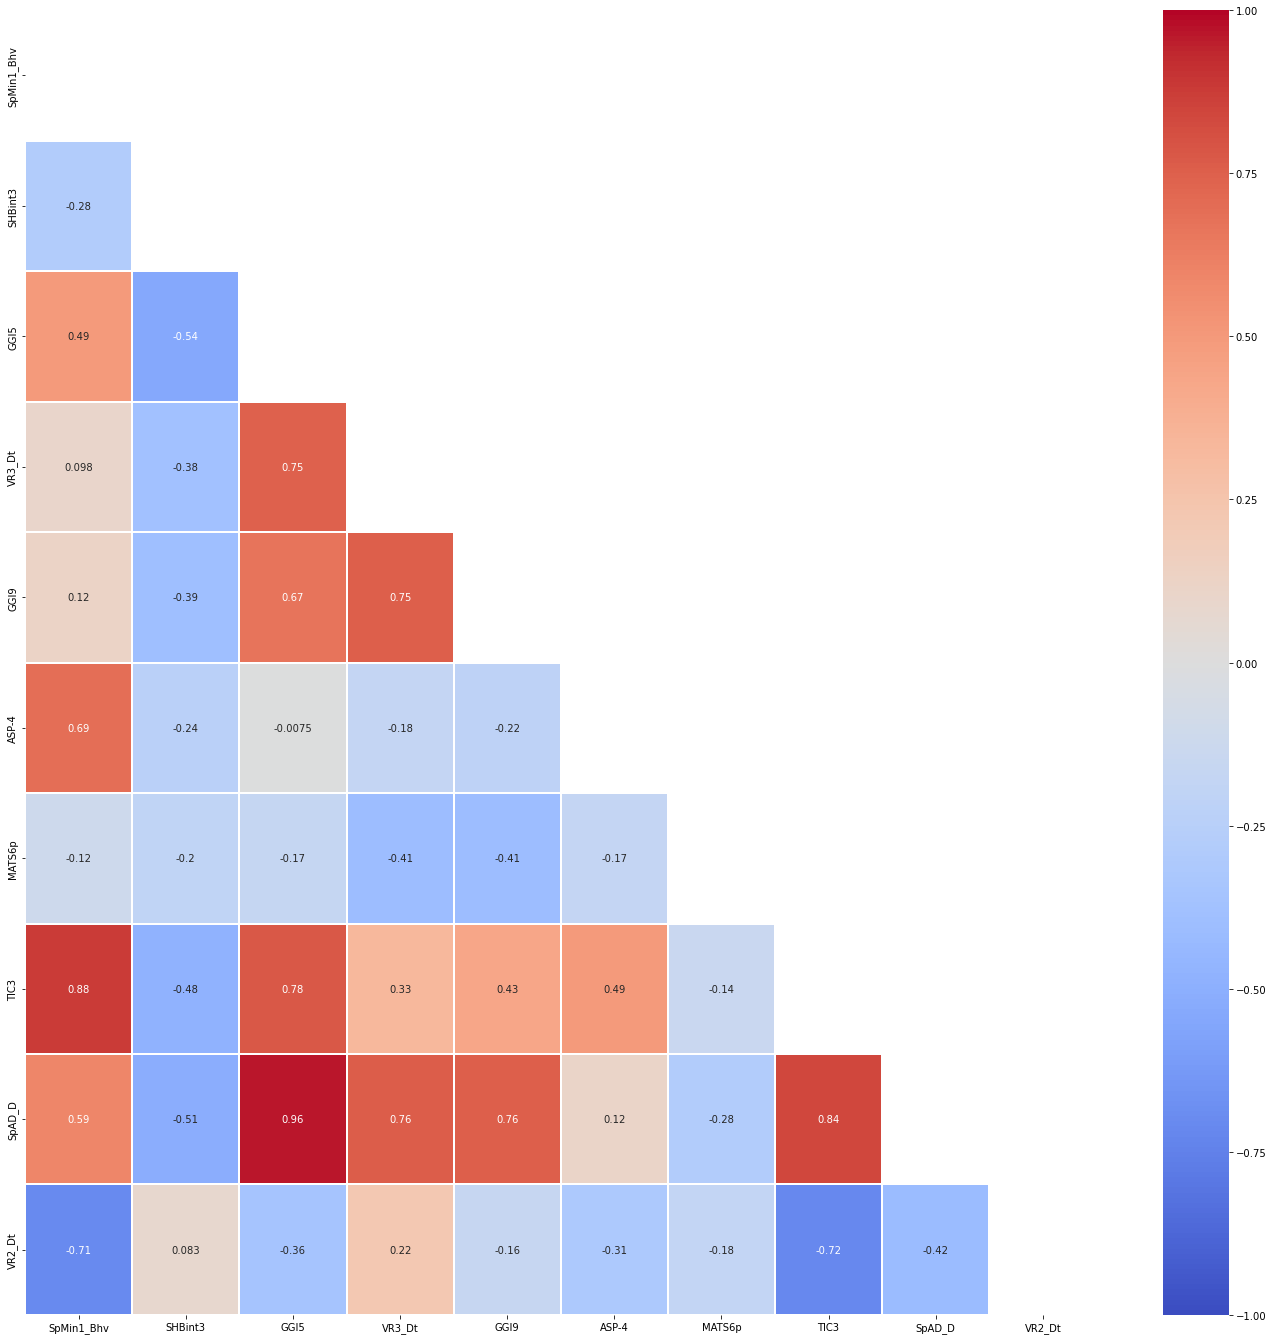

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.copy()
df_corr = df_corr.corr()
fig, ax = plt.subplots( figsize=(24,24) )
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr.corr(), linewidths=0.2, cmap = 'coolwarm', vmin = -1, vmax=1, mask=mask, linecolor='white', annot=True)
plt.savefig('heatmap.png')
plt.show()

- 상관계수가 큰 GGI9삭제

In [67]:
test1 = test1.drop(columns=['GGI5','GGI9'], axis=1)

### Data scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler
header = list(test1.columns.values)
scaler = MinMaxScaler()
test1_scaled = scaler.fit_transform(test1)
test1 = pd.DataFrame(test1_scaled, columns = header)

In [69]:
test1.shape
test1.head()

,SpMin1_Bhv,SHBint3,VR3_Dt,ASP-4,MATS6p,TIC3,SpAD_D,VR2_Dt
0,0.000000,0.000000,0.158873,0.000000,0.682113,0.000000,0.000000,1.000000e+00
1,0.470547,0.319769,0.002321,0.000000,0.682113,0.210151,0.026013,4.986390e-07
2,0.436796,0.352186,0.012013,0.000000,0.682113,0.183500,0.049137,3.362229e-07
3,0.337469,0.000000,0.023722,0.000000,0.682113,0.158140,0.070720,4.910150e-07
4,0.629906,0.215019,0.035798,0.816497,0.682113,0.418161,0.080320,3.297966e-06


### 데이터 분할

In [70]:
from sklearn.model_selection import train_test_split
test1 = np.array(test1)
y_data = np.array(y_data)
x_train, x_test, y_train, y_test = train_test_split(test1, y_data, random_state=777, test_size=0.2)
print(y_train[:3])

[[4.376]
 [4.96 ]
 [2.858]]


### Random Forest Regression

Model				 RMSE 		 R2
Random Forest Regressor 	 1.04 		0.42


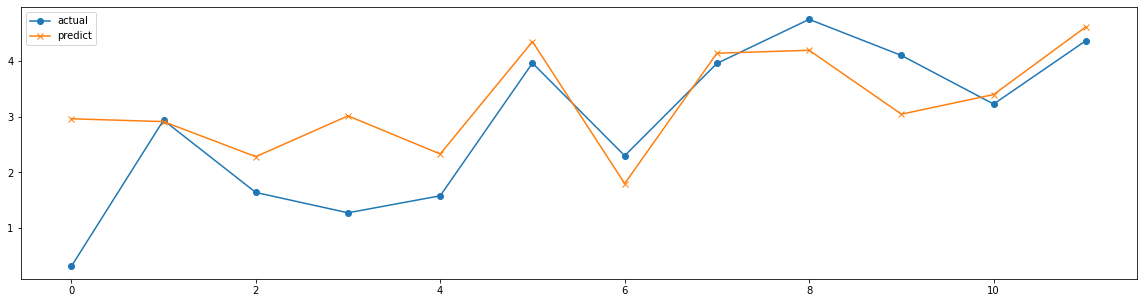

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train.ravel())
pred_rf = rf.predict(x_test)
print("Model\t\t\t\t RMSE \t\t R2")
print("Random Forest Regressor \t {:.2f} \t\t{:.2f}".format(np.sqrt(mean_squared_error(y_test, pred_rf)), r2_score(y_test, pred_rf)))

fig, ax1  = plt.subplots(nrows=1)
fig.set_size_inches(20,5)

ax1.plot(y_test, marker = "o" , label = "actual")
ax1.plot(pred_rf, marker = "x", label = "predict")
ax1.legend(prop={'size':10})